In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.model_selection import validation_curve

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [106]:
# label red as 0 and white as 1
red['class'] = 0
white['class'] = 1

In [107]:
# Concatenate and check null value records
wine = pd.concat([red, white])
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [108]:
data = wine.drop(['class'], axis=1).values
target = wine['class'].values

In [109]:
# Standard Scale preprocessing
ss = StandardScaler()
ss.fit(data)
data_scaled = ss.transform(data)

In [110]:
# Standard Scaled Model
train_scaled, test_scaled, train_target, test_target = train_test_split(data_scaled, target, test_size=0.2, shuffle=True, random_state=42)
print(train_scaled)

[[-0.47465165 -0.6054167   0.21586609 ... -1.08383282  0.00687492
  -0.93722961]
 [ 0.8367388  -0.36243847  1.11052557 ...  0.5963377   1.60000607
   1.35322771]
 [ 0.37389511  2.27994976 -2.12401256 ...  0.26030359  1.09691202
   0.20799905]
 ...
 [-0.62893288  0.18426254 -0.81643332 ... -0.6805919  -0.83161516
  -0.93722961]
 [-0.55179227 -0.48392759  1.24816549 ... -0.41176462 -0.83161516
  -0.93722961]
 [-0.01180796  1.70287646 -1.77991276 ...  0.05868313 -0.83161516
  -0.93722961]]


In [111]:
model = Sequential()
model.add(Dense(13, activation='sigmoid', input_shape=(12,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

sgd = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(test_scaled, test_target)

Epoch 1/5
163/163 [==============================] - 2s 1ms/step - loss: 0.1321 - accuracy: 0.9525
Epoch 2/5
163/163 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9938
Epoch 3/5
163/163 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9950
Epoch 4/5
163/163 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9948
Epoch 5/5
41/41 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9938


[0.03633812069892883, 0.9938461780548096]

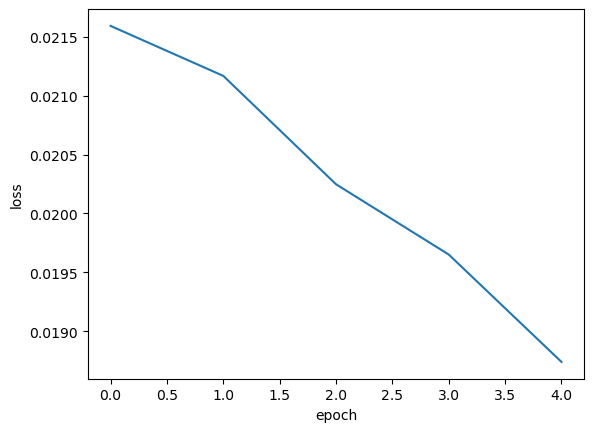

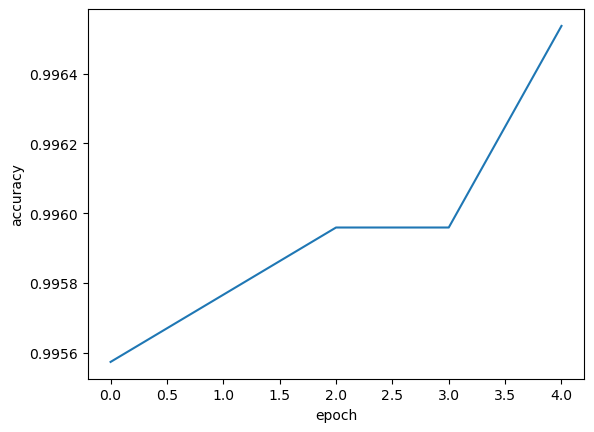

In [112]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

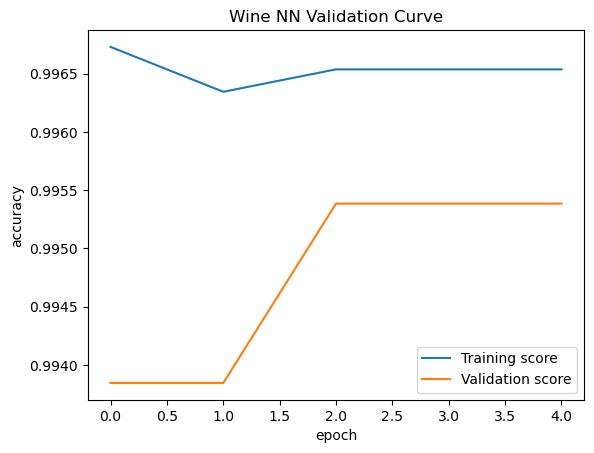

In [113]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0, 
										validation_data=(test_scaled, test_target))

plt.title('Wine NN Validation Curve', loc='center')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training score', 'Validation score'])
plt.savefig('graph\\wine_nn_lc.png', format='png')
plt.show()